<a href="https://www.kaggle.com/code/iahhel/customer-clustering-bkmeans-hierarchical-agglo?scriptVersionId=130511738" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**In this data science project, I applied four different clustering methods to a customer dataset to discover patterns and relationships among the customers. The clustering methods used were K-means, Breathing K-means, Agglomerative Clustering, and Hierarchical Clustering.**

 K-means is a well-known and widely used clustering algorithm that aims to partition the data into K clusters, where each observation belongs to the cluster with the nearest mean. The Breathing K-means method is a faster and more efficient version of K-means that produces higher-quality solutions.



 Agglomerative Clustering is a hierarchical clustering method that merges the two closest clusters iteratively until all observations belong to a single cluster. Hierarchical clustering is another clustering method that produces a tree-like structure of clusters based on a distance metric.



 By applying these four clustering methods, I was able to identify groups of customers with similar characteristics and behaviors, which can be used for targeted marketing, customer segmentation, and other business insights. Overall, this project demonstrates the power of clustering techniques in discovering hidden patterns in customer data.


**Importing packages and the data im going to be using.**

In [1]:
!pip install bkmeans

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from bkmeans import BKMeans
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.spatial import distance_matrix
from scipy.cluster import hierarchy

os.environ["OMP_NUM_THREADS"] = '1'
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'svg'

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('/kaggle/input/123qweasd/Mall_Customers.csv')
print(df.shape)
print(df.isna().sum())
df.head()

(200, 5)
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


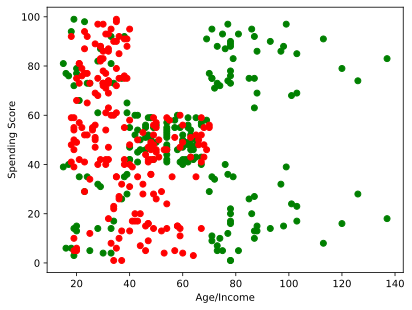

In [5]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c='g')
plt.scatter(df['Age'],df['Spending Score (1-100)'],c='r')
plt.ylabel('Spending Score')
plt.xlabel('Age/Income')
plt.show()

In [6]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0}) # encoding Gender column
x = df.drop('CustomerID',axis=1)

In [7]:
km = KMeans(n_clusters=4,init='k-means++',n_init=13) # fitting the data on the model with 3 as the number of clusters and getting labels
km.fit(x)
label = km.predict(x)

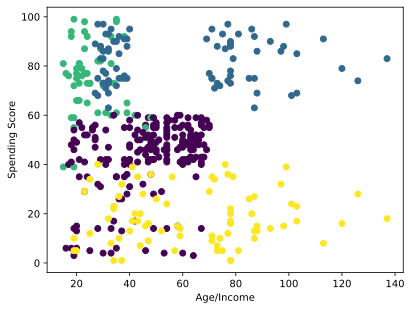

In [8]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c=label,cmap='viridis')
plt.scatter(df['Age'],df['Spending Score (1-100)'],c=label,cmap='viridis')
plt.ylabel('Spending Score')
plt.xlabel('Age/Income')
plt.show()

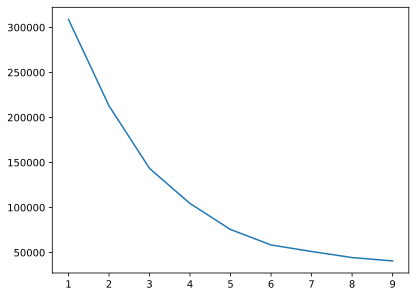

In [9]:
# using the elbow method to determine what number of clusters i should be using.
wcss = []
for i in range(1,10):
  kml = KMeans(n_clusters=i)
  kml.fit(x)
  wcss.append(kml.inertia_)
plt.plot(range(1,10),wcss)

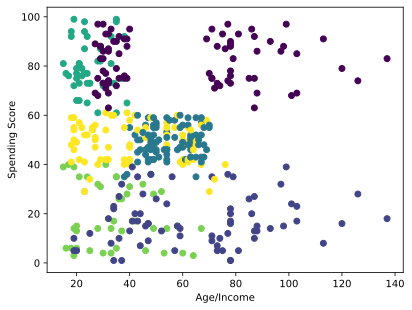

In [10]:
bkm = BKMeans(n_clusters=6, n_init=13) # Using breathing K-means method, as it's faster and better at performing
bkm.fit(x)
label2 = bkm.predict(x)
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c=label2,cmap='viridis')
plt.scatter(df['Age'],df['Spending Score (1-100)'],c=label2,cmap='viridis')
plt.ylabel('Spending Score')
plt.xlabel('Age/Income')
plt.show()

Applying Agglomerative clustering to the data

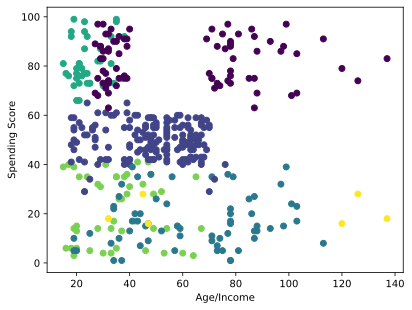

In [11]:
agglom = AgglomerativeClustering(linkage = 'average', n_clusters=6, metric='euclidean')
agglopred = agglom.fit_predict(x)
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c=agglopred,cmap='viridis')
plt.scatter(df['Age'],df['Spending Score (1-100)'],c=agglopred,cmap='viridis')
plt.ylabel('Spending Score')
plt.xlabel('Age/Income')
plt.show()

In [12]:
x_min, x_max = np.min(x, axis=0), np.max(x, axis=0) # normalizing the data and getting it's distance matrix to plot a dendrogram.
X1 = (x - x_min) / (x_max - x_min)

dist_matrix = distance_matrix(X1,X1)

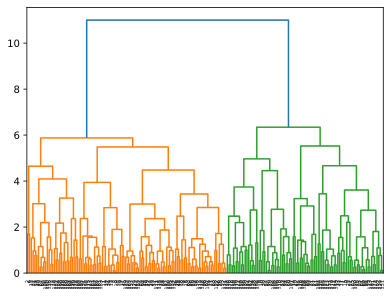

In [13]:
Z = hierarchy.linkage(dist_matrix, 'complete')
dendro = hierarchy.dendrogram(Z)